#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [20]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Task1: Basic Data Exploration
Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

### Identify the number of rows and columns in the dataset:

In [22]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 148654
Number of columns: 13


### Determine the data types of each column:

In [23]:
data_types_per_col = df.dtypes
print("Data types of each column:\n", data_types_per_col)

Data types of each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


### Check for missing values in each column:

In [24]:
# missing_values that has null
missing_values_per_col = df.isnull().sum()
print("Missing values in each column:\n", missing_values_per_col)

Missing values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


## Task2: Descriptive Statistics
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

### Calculate basic statistics mean, median, mode, minimum, and maximum salary

In [25]:
# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().values[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

# Print the calculated statistics
print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)

Mean salary: 74768.32197169267
Median salary: 71426.60999999999
Mode salary: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43


###  determine the range of salaries

In [26]:
range_salary = max_salary - min_salary
print("Range of salaries:", range_salary)

Range of salaries: 568213.56


### find the standard deviation.

In [27]:
std_salary = df['TotalPay'].std()
print("Standard deviation of salaries:", std_salary)

Standard deviation of salaries: 50517.00527394987


## Task3: Data Cleaning

Handle missing data by suitable method with explain why you use it.

To handle missing data in the given dataset,I want to know how this missing data relitive to data 

In [29]:
# I define it as method so I can reuse it to check my progress 
def count_and_print_missing_data(df):
    # Count non-missing values per column
    non_missing_counts = df.count()

    # Count missing values per column
    missing_counts = df.isnull().sum()

    # Print the results in a table format
    print("Column Name\t\t| Number of All Records\t| Number of Missing Data")
    print("-" * 70)

    for column_name in df.columns:
      print(f"{column_name.ljust(20)}\t| {str(non_missing_counts[column_name]).ljust(20)}\t| {missing_counts[column_name]}")

count_and_print_missing_data(df)

Column Name		| Number of All Records	| Number of Missing Data
----------------------------------------------------------------------
Id                  	| 148654              	| 0
EmployeeName        	| 148654              	| 0
JobTitle            	| 148654              	| 0
BasePay             	| 148045              	| 609
OvertimePay         	| 148650              	| 4
OtherPay            	| 148650              	| 4
Benefits            	| 112491              	| 36163
TotalPay            	| 148654              	| 0
TotalPayBenefits    	| 148654              	| 0
Year                	| 148654              	| 0
Notes               	| 0                   	| 148654
Agency              	| 148654              	| 0
Status              	| 0                   	| 148654


Now we need to address the missing values in the 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',  'Notes' and ' 'Status' columns. 

Here's a suggested approach to handle the missing data using suitable methods:

BasePay, OvertimePay, OtherPay, Benefits: Since the missing values in these columns represent numeric data, there is many way but I will choose to calculate these values as we have total to make sure I have more correctness in data

I am not sure what the formula is but I will assume it is as 

`TotalPay = BasePay + OvertimePay + OtherPay`

`TotalPayBenefits = TotalPay + Benefits`

first I will check OvertimePay and OtherPay as we have only 4 missing

In [10]:
df.loc[df['OvertimePay'].isna() | df['OvertimePay'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [11]:
# I want to check these data
df.loc[(df['EmployeeName'] == 'Not provided') | (df['JobTitle'] == 'Not provided')]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


as we can see these 4 records with missing data even in name and job and I think this is a business decision ,
currently I will keep these records as it has data in Year and Agency as I may need them

In [30]:
# Fill missing values in 'OvertimePay' and 'OtherPay' using 0 as the total there is 0
df['OvertimePay'].fillna(0, inplace=True)
df['OtherPay'].fillna(0, inplace=True)

count_and_print_missing_data(df)

Column Name		| Number of All Records	| Number of Missing Data
----------------------------------------------------------------------
Id                  	| 148654              	| 0
EmployeeName        	| 148654              	| 0
JobTitle            	| 148654              	| 0
BasePay             	| 148045              	| 609
OvertimePay         	| 148654              	| 0
OtherPay            	| 148654              	| 0
Benefits            	| 112491              	| 36163
TotalPay            	| 148654              	| 0
TotalPayBenefits    	| 148654              	| 0
Year                	| 148654              	| 0
Notes               	| 0                   	| 148654
Agency              	| 148654              	| 0
Status              	| 0                   	| 148654


In [31]:
# Calculate the missing values in 'BasePay' using the equation: TotalPay = BasePay + OvertimePay + OtherPay
missing_basepay_rows = df['BasePay'].isnull()
df.loc[missing_basepay_rows, 'BasePay'] = df.loc[missing_basepay_rows, 'TotalPay'] - df.loc[missing_basepay_rows, 'OvertimePay'] - df.loc[missing_basepay_rows, 'OtherPay']

count_and_print_missing_data(df)

Column Name		| Number of All Records	| Number of Missing Data
----------------------------------------------------------------------
Id                  	| 148654              	| 0
EmployeeName        	| 148654              	| 0
JobTitle            	| 148654              	| 0
BasePay             	| 148654              	| 0
OvertimePay         	| 148654              	| 0
OtherPay            	| 148654              	| 0
Benefits            	| 112491              	| 36163
TotalPay            	| 148654              	| 0
TotalPayBenefits    	| 148654              	| 0
Year                	| 148654              	| 0
Notes               	| 0                   	| 148654
Agency              	| 148654              	| 0
Status              	| 0                   	| 148654


In [32]:
# Calculate the missing values in 'Benefits' using the equation: Benefits = TotalPayBenefits - TotalPay
missing_benefits_rows = df['Benefits'].isnull()
df.loc[missing_benefits_rows, 'Benefits'] = df.loc[missing_benefits_rows, 'TotalPayBenefits'] - df.loc[missing_benefits_rows, 'TotalPay']

count_and_print_missing_data(df)

Column Name		| Number of All Records	| Number of Missing Data
----------------------------------------------------------------------
Id                  	| 148654              	| 0
EmployeeName        	| 148654              	| 0
JobTitle            	| 148654              	| 0
BasePay             	| 148654              	| 0
OvertimePay         	| 148654              	| 0
OtherPay            	| 148654              	| 0
Benefits            	| 148654              	| 0
TotalPay            	| 148654              	| 0
TotalPayBenefits    	| 148654              	| 0
Year                	| 148654              	| 0
Notes               	| 0                   	| 148654
Agency              	| 148654              	| 0
Status              	| 0                   	| 148654


The 'Notes' and 'Status' columns contain only missing values (148,654 missing out of 148,654 total records).
In this case, the column doesn't provide any useful information and can be dropped from the dataset.

In [33]:
# Drop the 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)

count_and_print_missing_data(df)

Column Name		| Number of All Records	| Number of Missing Data
----------------------------------------------------------------------
Id                  	| 148654              	| 0
EmployeeName        	| 148654              	| 0
JobTitle            	| 148654              	| 0
BasePay             	| 148654              	| 0
OvertimePay         	| 148654              	| 0
OtherPay            	| 148654              	| 0
Benefits            	| 148654              	| 0
TotalPay            	| 148654              	| 0
TotalPayBenefits    	| 148654              	| 0
Year                	| 148654              	| 0
Agency              	| 148654              	| 0


## Task4: Basic Data Visualization

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

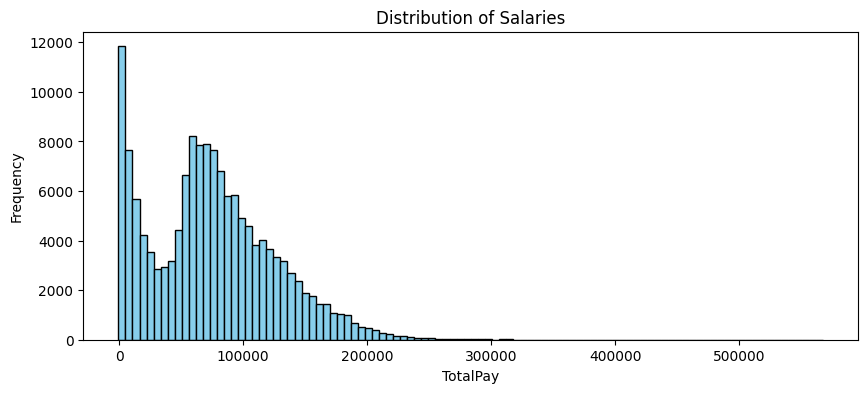

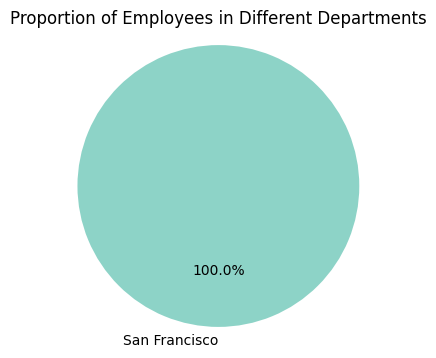

In [35]:
# make sure to install it first => pip3 install matplotlib
import matplotlib.pyplot as plt

# Distribution of salaries (Histogram)
plt.figure(figsize=(10, 4))
plt.hist(df['TotalPay'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

# Proportion of employees in different departments (Pie chart)
# I think 'Agency' is department col
department_counts = df['Agency'].value_counts()
labels = department_counts.index
sizes = department_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.axis('equal')
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [36]:
df['Agency'].eq('San Francisco').all()

True

## Task5: Grouped Analysis

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [37]:
# Group the data by one or more columns and calculate summary statistics
grouped_data = df.groupby(['Year', 'JobTitle'])
summary_stats = grouped_data['TotalPay'].agg(['count', 'mean', 'min', 'max'])

# Compare average salaries across different groups
average_salaries = grouped_data['TotalPay'].mean().sort_values(ascending=False)

print("Summary Statistics:")
print(summary_stats)

print("\nAverage Salaries across Groups:")
print(average_salaries)

Summary Statistics:
                                     count           mean        min  \
Year JobTitle                                                          
2011 ACCOUNT CLERK                      83   44035.664337     614.00   
     ACCOUNTANT                          5   47429.268000    1148.40   
     ACCOUNTANT INTERN                  48   29031.742917    2981.53   
     ACUPUNCTURIST                       1   67594.400000   67594.40   
     ADMINISTRATIVE ANALYST             93   63954.867527    2388.24   
...                                    ...            ...        ...   
2014 Wire Rope Cable Maint Sprv          1  190575.900000  190575.90   
     Worker's Comp Supervisor 1          6   56689.446667      56.64   
     Worker's Compensation Adjuster     26   70636.455385    1837.39   
     X-Ray Laboratory Aide              35   51211.566857   11341.85   
     Youth Comm Advisor                  1   36465.910000   36465.91   

                                           

## Task6: Simple Correlation Analysis

Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

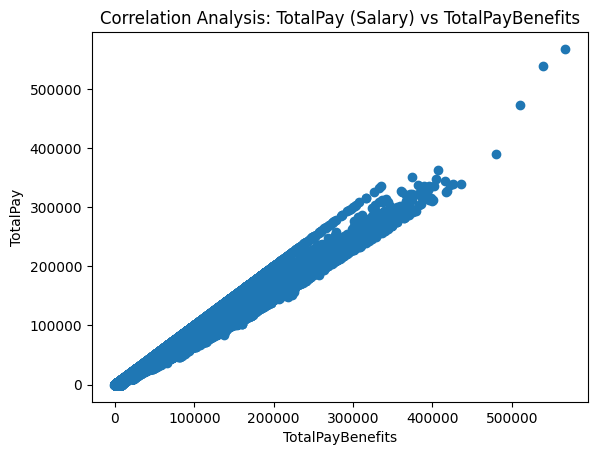

Correlation coefficient: 0.9773128522072129


In [38]:
import matplotlib.pyplot as plt

salary_header = 'TotalPay'
othe_pay_benefits = 'TotalPayBenefits'
# Perform correlation analysis
correlation = df[salary_header].corr(df[othe_pay_benefits])

# Visualize the relationship with a scatter plot
plt.scatter(df[othe_pay_benefits], df[salary_header])
plt.xlabel(othe_pay_benefits)
plt.ylabel(salary_header)
plt.title(f'Correlation Analysis: {salary_header} (Salary) vs {othe_pay_benefits}')
plt.show()

print("Correlation coefficient:", correlation)

## Task7: Summary of Insights (no task with number 7 so I will make this 7)

Write a brief report summarizing the findings and insights from the analyses.

- The median salary of $71,426.61 indicates that half of the salaries in the dataset are below this value, while the other half are above it. This provides a measure of the central tendency and helps understand the distribution of salaries in the dataset.

- The most frequently occurring value in the salary dataset is 0.0. It is important to note that this value might require further investigation as it could indicate an error or a specific context that needs clarification. Additionally, the minimum salary in the dataset is -$618.13, and negative salary values should be examined carefully to understand their context and validity.

- there are some missing data or not provided data which we need to discuss about so maybe we can add some validation in way we enter these values

- All employees in the dataset are from San Francisco. This information suggests that the dataset exclusively represents employees from the San Francisco area, and further analysis should consider this geographical context.

- It is worth investigating cases where the mean salary is 0 in certain years for specific job titles. This anomaly might indicate data quality issues or specific circumstances that require deeper understanding or data validation.

- The salaries for some job titles, such as Chief of Police, show a decreasing trend year after year. This observation highlights the need for further examination to understand the underlying factors contributing to the salary decrease and evaluate any potential implications or reasons for this pattern.

- The correlation coefficient of 0.9773128522072129 between TotalPay and TotalPayBenefits indicates a strong positive linear relationship. This means that changes in one variable (TotalPay) are strongly associated with changes in the other variable (TotalPayBenefits), and they tend to move together in a consistent manner. This correlation coefficient suggests a high degree of similarity and association between the two variables.

# Good Luck!